In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  Price  Customer ID         Country  
0  01-12-2010 08:26   2.55      17850.0  United Kingdom  
1  01-12-2010 08:26   3.39      17850.0  United Kingdom  
2  01-12-2010 08:26   2.75      17850.0  United Kingdom  
3  01-12-2010 08:26   3.39      17850.0  United Kingdom  
4  01-12-2010 08:26   3.39      17850.0  United Kingdom  


In [37]:
df = pd.read_csv("/content/data.csv", encoding='ISO-8859-1')
print(df.shape)
df.head()

(541910, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [46]:
print("Missing values per column:")
print(df.isnull().sum())
df = df.dropna(subset=['Customer ID'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['TotalPrice'] = df['Quantity'] * df['Price']
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

Missing values per column:
Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


/tmp/ipython-input-3756209230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
/tmp/ipython-input-3756209230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['Price']
/tmp/ipython-input-3756209230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [47]:
df = df.dropna(subset=['Customer ID'])

In [48]:
df = df[~df['InvoiceDate'].astype(str).str.contains('C')]

In [49]:
# basic information about the dataset
print("\nDataset info:")
print(df.info())

# statistical summary
print("\nStatistical summary:")
print(df.describe())

# check unique values
print("\nUnique values:")
print("Customers:", df['Customer ID'].nunique())
print("Products:", df['StockCode'].nunique())
print("Countries:", df['Country'].nunique())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 406830 entries, 0 to 541909
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice       406830 non-null  object        
 1   StockCode     406830 non-null  object        
 2   Description   406830 non-null  object        
 3   Quantity      406830 non-null  int64         
 4   InvoiceDate   406830 non-null  datetime64[ns]
 5   Price         406830 non-null  float64       
 6   Customer ID   406830 non-null  float64       
 7   Country       406830 non-null  object        
 8   TotalPrice    406830 non-null  float64       
 9   InvoiceMonth  406830 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 34.1+ MB
None

Statistical summary:
            Quantity                    InvoiceDate          Price  \
count  406830.000000                         406830  406830.000000   
mean


Top 10 customers by number of purchases:
Customer ID
14911.0    248
12748.0    225
17841.0    168
14606.0    129
15311.0    118
13089.0    114
12971.0     86
14527.0     85
13408.0     77
14646.0     77
Name: InvoiceDate, dtype: int64


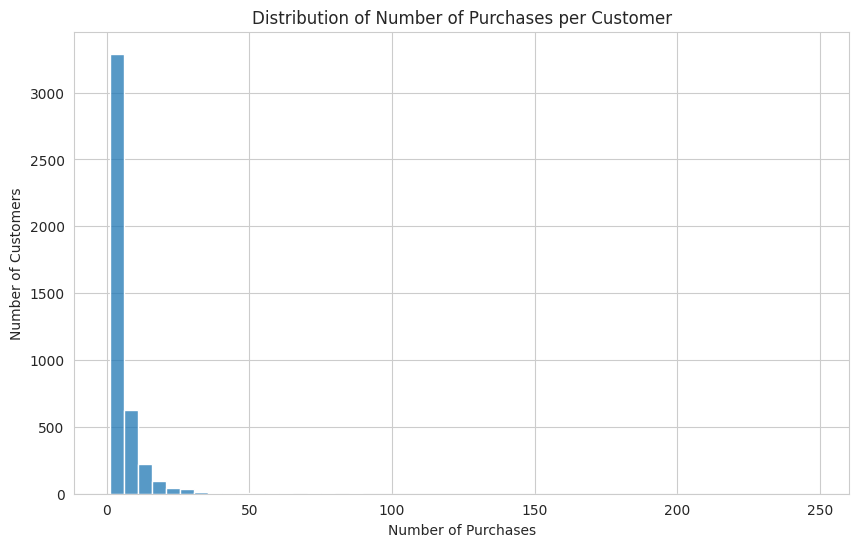


Top 10 customers by total spending:
Customer ID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: TotalPrice, dtype: float64


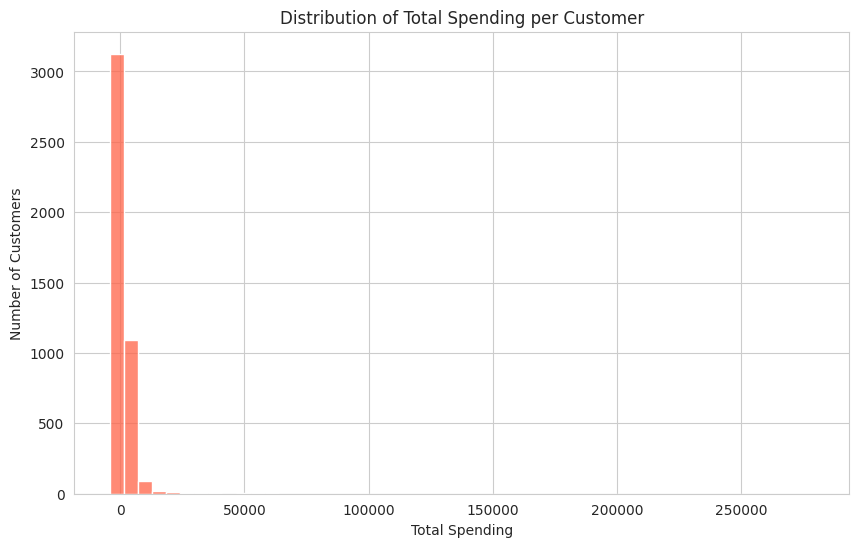

In [53]:
# customer purchase frequency
customer_purchases = df.groupby('Customer ID')['InvoiceDate'].nunique().sort_values(ascending=False)
print("\nTop 10 customers by number of purchases:")
print(customer_purchases.head(10))

# plot customer purchase frequency
plt.figure(figsize=(10, 6))
sns.histplot(customer_purchases, bins=50, kde=False)   # ❌ color='' hata diya
plt.title('Distribution of Number of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

# customer spending analysis
customer_spending = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False)
print("\nTop 10 customers by total spending:")
print(customer_spending.head(10))

# plot customer spending
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending, bins=50, kde=False, color='#FF6347')  # ✔ valid color
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()



Top 10 products by quantity sold:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64

Top 10 products by revenue:
Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66728.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASK

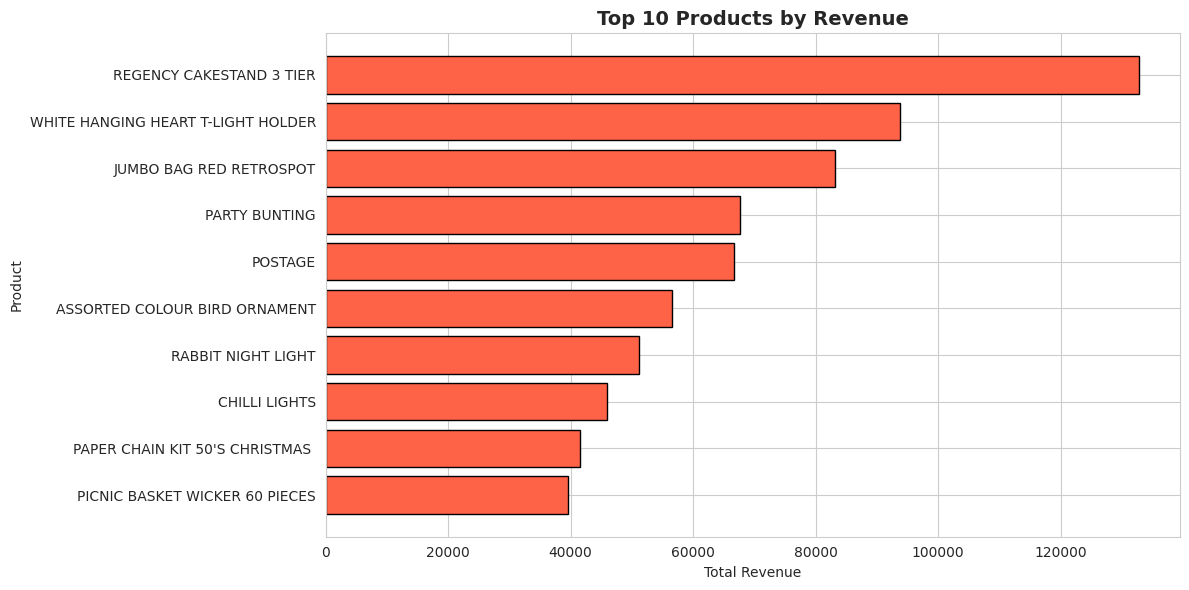

In [55]:
import matplotlib.pyplot as plt

# most popular products
product_popularity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("\nTop 10 products by quantity sold:")
print(product_popularity.head(10))

# highest revenue products
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
print("\nTop 10 products by revenue:")
print(product_revenue.head(10))

# top 10 products by revenue
plt.figure(figsize=(12, 6))

top_products = product_revenue.head(10).sort_values()

# Force red bars only
bars = plt.barh(
    top_products.index,
    top_products.values,
    color=['#FF6347'] * len(top_products),
    edgecolor='black'
)

plt.title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Total Revenue')
plt.ylabel('Product')

plt.tight_layout()
plt.show()

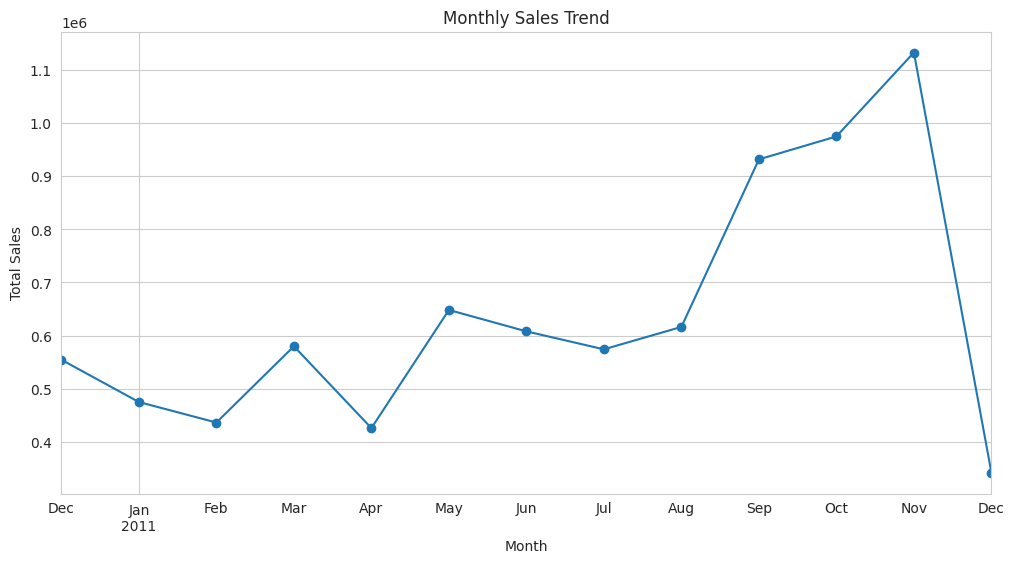

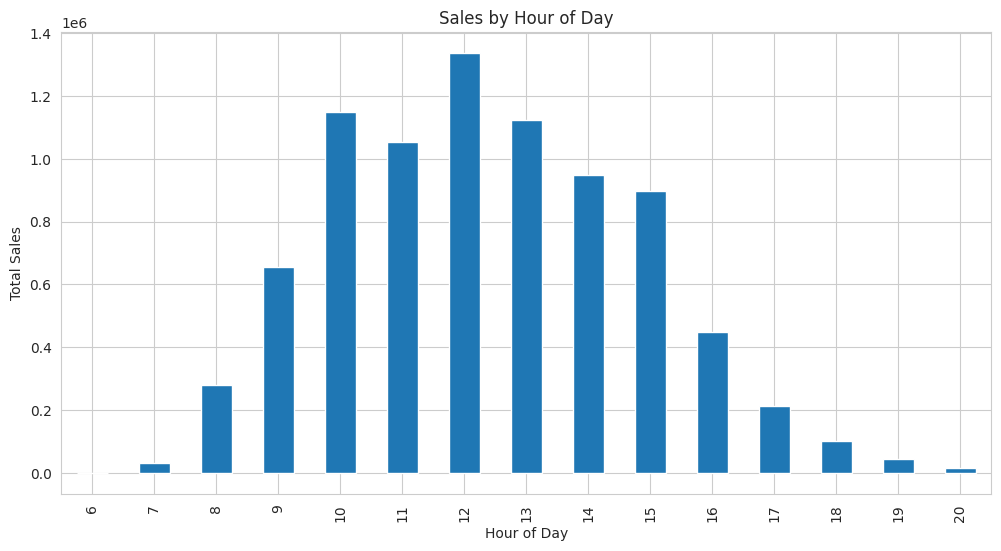

In [56]:
# Monthly sales trend
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Daily sales pattern
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('InvoiceHour')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar')
plt.title('Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.show()

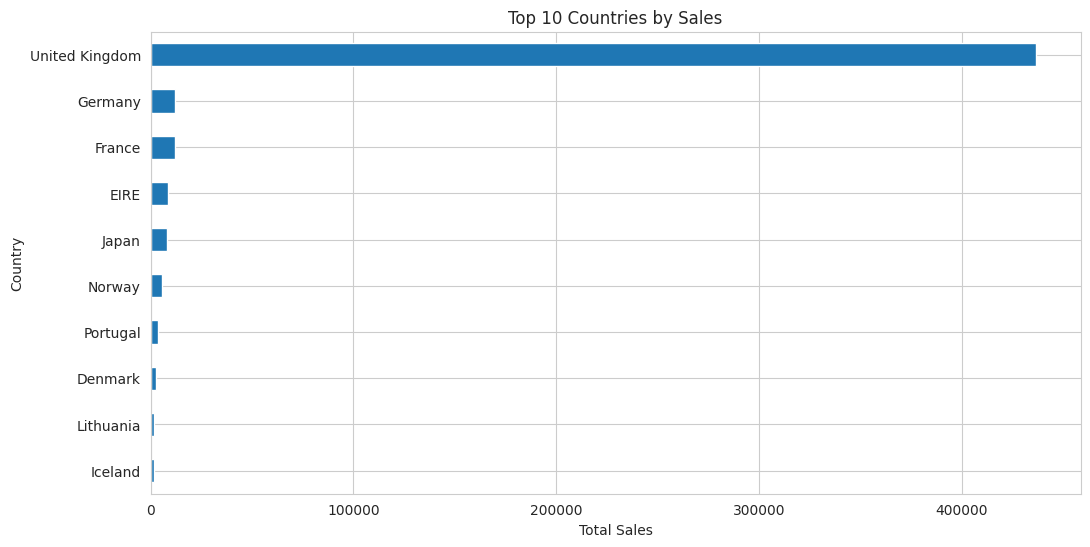

In [ ]:
# Sales by country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_sales.head(10).sort_values().plot(kind='barh')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()